### 붓꽃 데이터 품종 분류 (강재영)

In [41]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [42]:
# 데이터 불러오기
iris_data = datasets.load_iris()
input_data = iris_data.data
correct = iris_data.target

# 샘플 수
n_data = len(correct)

In [43]:
input_data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [44]:
correct

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

#### 표준화 식
#### 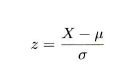
#### z: 표준화된 데이터
#### X: 원래 데이터
#### μ: 원래 데이터의 평균값
#### σ: 원래 데이터의 표준편차

In [45]:
# 입력 데이터 표준화
ave_input = np.average(input_data, axis=0)
std_input = np.std(input_data, axis=0)
input_data = (input_data - ave_input) / std_input

In [46]:
# 정답을 One-Hot encoding
correct_data = np.zeros((n_data, 3))
for i in range(n_data):
    correct_data[i, correct[i]] = 1.0

In [47]:
# 훈련 데이터와 테스트 데이터
index = np.arange(n_data)
index_train = index[index%2 == 0]
index_test = index[index%2 != 0]

# 훈련 데이터 입력
input_train = input_data[index_train, :]
# 훈련 데이터 정답
correct_train = correct_data[index_train, :]
# 테스트 데이터 입력
input_test = input_data[index_test, :]
# 테스트 데이터 정답
correct_test = correct_data[index_test, :]

# 훈련 데이터 샘플 수
n_train = input_train.shape[0]
# 테스트 데이터 샘플 수
n_test = input_test.shape[0]

# 각 설정 값
n_in = 4
n_mid = 25
n_out = 3

wb_width = 0.1
eta = 0.01
epoch = 1000
batch_size = 8
interval = 100

In [48]:
# 각 층의 부모 클래스 생성
class BaseLayer:
    def __init__(self, n_upper, n):
        self.w = wb_width * np.random.randn(n_upper, n)
        self.b = wb_width * np.random.randn(n)
        
    def update(self, eta):
        self.w -= eta * self.grad_w
        self.b -= eta * self.grad_b
        
# 은닉층
class MiddleLayer(BaseLayer):
    def forward(self, x):
        self.x = x
        self.u = np.dot(x,self.w) + self.b
        self.y = np.where(self.u <= 0, 0, self.u) # ReLU
        
    def backward(self, grad_y):
        delta = grad_y * np.where(self.u <= 0, 0, 1) # ReLU 미분
        
        self.grad_w = np.dot(self.x.T, delta)
        self.grad_b = np.sum(delta, axis=0)
        self.grad_x = np.dot(delta, self.w.T)

# 출력층
class OutputLayer(BaseLayer):
    def forward(self,x):
        self.x = x
        u = np.dot(x, self.w) + self.b
        self.y = np.exp(u)/np.sum(np.exp(u), axis=1, keepdims=True)
        
    def backward(self, t):
        delta = self.y -t
        
        self.grad_w = np.dot(self.x.T, delta)
        self.grad_b = np.sum(delta, axis=0)
        self.grad_x = np.dot(delta, self.w.T)

In [49]:
# 각 층 초기화
middle_layer_1 = MiddleLayer(n_in, n_mid)
middle_layer_2 = MiddleLayer(n_mid, n_mid)
output_layer = OutputLayer(n_mid, n_out)

In [50]:
# 순전파
def forward_propagation(x):
    middle_layer_1.forward(x)
    middle_layer_2.forward(middle_layer_1.y)
    output_layer.forward(middle_layer_2.y)
    
# 역전파
def backpropagation(t):
    output_layer.backward(t)
    middle_layer_2.backward(output_layer.grad_x)
    middle_layer_1.backward(middle_layer_2.grad_x)

In [51]:
# 가중치와 편향 수정
def uppdate_wb():
    middle_layer_1.update(eta)
    middle_layer_2.update(eta)
    output_layer.update(eta)

In [52]:
# 교차 엔트로피 오차 계산
def get_error(t, batch_size):
    return -np.sum(t * np.log(output_layer.y + 1e-7) / batch_size)

In [53]:
# 오차 기록용
train_error_x = []
train_error_y = []
test_error_x = []
test_error_y = []

In [54]:
# 학습과 경과 기록

# 1 에포크당 배치 수
n_batch = n_train // batch_size
for i in range(epoch):
    
    # 오차 계측
    forward_propagation(input_train)
    error_train = get_error(correct_train, n_train)
    forward_propagation(input_test)
    error_test = get_error(correct_test, n_test)
    
    # 오차 기록
    test_error_x.append(i)
    test_error_y.append(error_test)
    train_error_x.append(i)
    train_error_y.append(error_train)
    
    # 경과 표시
    if i%interval == 0:
        print("Epoch:" + str(i) + "/" + str(epoch),
              "Error_train:" + str(error_train),
              "Error_test:" + str(error_test))
        
    # 학습
    index_random = np.arange(n_train)
    np.random.shuffle(index_random)
    
    for j in range(n_batch):
        
        #미니 배치 샘플 추출
        mb_index = index_random[j*batch_size : (j+1)*batch_size]
        x = input_train[mb_index, :]
        t = correct_train[mb_index, :]
        
        # 순전파와 역전파
        forward_propagation(x)
        backpropagation(t)
        
        # 가중치와 편향 수정
        uppdate_wb()

Epoch:0/1000 Error_train:1.0991655200614137 Error_test:1.098637401295888
Epoch:100/1000 Error_train:0.027870068612140857 Error_test:0.068680069010504
Epoch:200/1000 Error_train:0.02065481956045044 Error_test:0.09217770829000177
Epoch:300/1000 Error_train:0.0110330540610025 Error_test:0.10515721215461296
Epoch:400/1000 Error_train:0.010817971056487016 Error_test:0.1230757371301025
Epoch:500/1000 Error_train:0.007315179454241895 Error_test:0.1451068517302633
Epoch:600/1000 Error_train:0.003960477003196009 Error_test:0.16344431627599404
Epoch:700/1000 Error_train:0.002385593360120456 Error_test:0.18018404334180257
Epoch:800/1000 Error_train:0.0020775551463717125 Error_test:0.19415114034375555
Epoch:900/1000 Error_train:0.0013906014291602824 Error_test:0.2048642536702218


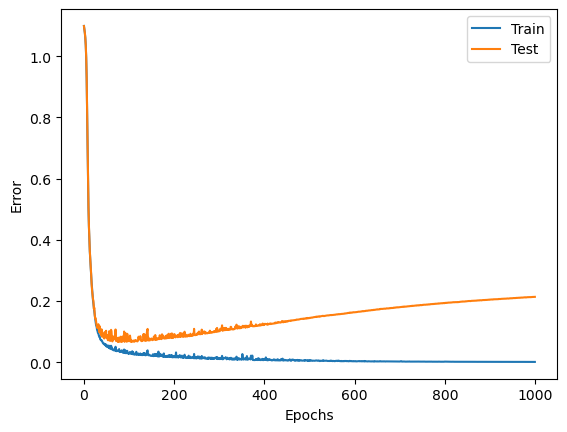

In [55]:
# 기록된 오차를 그래프로 표시
plt.plot(train_error_x, train_error_y, label="Train")
plt.plot(test_error_x, test_error_y, label="Test")
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Error")

plt.show()

In [56]:
# 정답률 측정
forward_propagation(input_train)
count_train = np.sum(np.argmax(output_layer.y,
        axis=1) == np.argmax(correct_train, axis=1))

forward_propagation(input_test)
count_test = np.sum(np.argmax(output_layer.y,
        axis=1) == np.argmax(correct_test, axis=1))

print("Accuracy Train:", str(count_train/n_train*100) + "%",
     "Accuracy Test:", str(count_test/n_test*100) + "%")

Accuracy Train: 100.0% Accuracy Test: 97.33333333333334%


### - 결과
#### 학습이 진행됨에 따라 훈련 오차와 테스트 오차의 차이가 벌어지며 과적합 발생 (신경망이 훈련 데이터에 과도하게 적응함, 훈련 데이터 샘플 수가 75개로 적음)
#### 1000 epoch를 학습시킨 결과 정답률: 93.3%

### - 과적합 방지 대책
#### ① 최적화 알고리즘을 확률적 경사 하강법에서 Adagrad로 변경
#### ② Dropout 도입

### - Adagrad 구현
#### 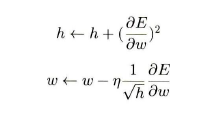
#### h는 매 회 수정할 때마다 증가하기 때문에 다음번 수정량은 조금씩 감소됨
#### 편향 수정식은 가중치 수정식과 동일

In [57]:
# 아다그라드 적용
class BaseLayer:
    def __init__(self, n_upper, n):
        self.w = wb_width * np.random.randn(n_upper, n)
        self.b = wb_width * np.random.randn(n)
        self.h_w = np.zeros(( n_upper, n)) + 1e-8
        self.h_b = np.zeros(n) + 1e-8
    
    def update(self, eta):
        self.h_w += self.grad_w * self.grad_w
        self.w -= eta / np.sqrt(self.h_w) * self.grad_w
        
        self.h_b += self.grad_b * self.grad_b
        self.b -= eta / np.sqrt(self.h_b) * self.grad_b

### - Dropout 구현
#### 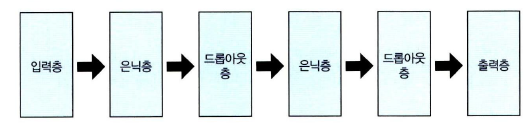

In [58]:
# 드롭아웃
class Dropout:
    def __init__(self, dropout_ratio):
        self.dropout_ratio = dropout_ratio
    
    def forward(self, x, is_train):   # is train: 학습할 때는 True
        if is_train:
            rand = np.random.rand(*x.shape)   # 난수 행렬
            self.dropout = np.where(rand > self.dropout_ratio, 1, 0)
            self.y = x * self.dropout   # 뉴런을 무작위로 무효화
        else:
            self.y = (1-self.dropout_ratio)*x
            
    def backward(self, grad_y):
        self.grad_x = grad_y * self.dropout

In [61]:
# 각 층의 초기화
middle_layer_1 = MiddleLayer(n_in, n_mid)
dropout_1 = Dropout(0.5)
middle_layer_2 = MiddleLayer(n_mid, n_mid)
dropout_2 = Dropout(0.5)
output_layer = OutputLayer(n_mid, n_out)

# 순전파
def forward_propagation(x, is_train):
    middle_layer_1.forward(x)
    dropout_1.forward(middle_layer_1.y, is_train)
    middle_layer_2.forward(dropout_1.y)
    dropout_2.forward(middle_layer_2.y, is_train)
    output_layer.forward(dropout_2.y)
    
# 역전파
def backpropagation(t):
    output_layer.backward(t)
    dropout_2.backward(output_layer.grad_x)
    middle_layer_2.backward(dropout_2.grad_x)
    dropout_1.backward(middle_layer_2.grad_x)
    middle_layer_1.backward(dropout_1.grad_x)

In [62]:
samples = np.array([[5.0, 3.5, 1.0, 0.5],
                   [5.5, 2.5, 4.0, 1.0],
                   [7.0, 3.0, 6.0, 2.0],
                   [6.6, 2.5, 1.5, 0.2]
                   ])

# 표준화
ave_input = np.average(samples, axis=0)
std_input = np.std(samples, axis=0)
samples = (samples - ave_input) / std_input

forward_propagation(samples, False)   # False는 훈련 데이터가 아님을 표시
print(output_layer.y)

[[0.31597428 0.3729134  0.31111232]
 [0.31687664 0.37168793 0.31143543]
 [0.31722886 0.37386134 0.3089098 ]
 [0.31846595 0.36911677 0.31241728]]


### - 결과
#### 각 행은 꽃을 나타냄
#### 열은 왼쪽부터 세토사, 버지컬러, 버지니카 품종을 의미